### Lab IV: Linear Models
### Answer all three sets of questions

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There's further explanation at the end of this document, if needed.
3. Can linear regression be used for classification? Explain why, or why not.
4. If you have a high accuracy on testing but low on testing, what might be the problem? It also might be you see a pattern in the residuals. 
5. Review this page: [Non-Linear with Linear](https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_non_linear_link.html) What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

**Q1.** Load clean q1_clean: https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv 

The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighborhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighborhood `; which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighborhood `.
2. Regress price on `Neighborhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighborhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Run a regression of `Price` on `Review Scores Rating` and `Neighborhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multiple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly skewed variables that require a log or arcsinh transformation) Note this is different than normalizing: there is a text below that explains further. Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the RMSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

### Dummy Variable Trap 


In linear regression with categorical variables you should be careful of the Dummy Variable Trap. 
The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a 
scenario in which two or more variables are highly correlated; in simple terms one variable can 
be predicted from the others. This can produce singularity of a model, meaning your model just won't 
work. Read about it here

Idea is to use dummy variable encoding with drop_first=True, this will omit one column from each 
category after converting categorical variable into dummy/indicator variables. You WILL NOT lose 
and relevant information by doing that simply because your all point in dataset can fully be 
explained by rest of the features.

Here is complete code on how you can do it for a "jobs" dataset

So you have your X features:

Age, Gender, Job, Classification 

And one numerical features that you are trying to predict:

Wage

First you need to split your initial dataset on input variables and prediction, 
assuming its pandas dataframe it would look like this:

Input variables (your dataset is bit different but whole code remains the same, 
you will put every column from dataset in X, except one that will go to Y. pd.get_dummies 
works without problem like that - it will just convert categorical variables and it won't 
touch numerical):

X = jobs[['Age','Gender','Job','Classification']]

Prediction:

Y = jobs['Wage']

Convert categorical variable into dummy/indicator variables and drop one in each category:

X = pd.get_dummies(data=X, drop_first=True)

So now if you check shape of X (X.shape) with drop_first=True you will see that it has 
4 columns less - one for each of your categorical variables.

You can now continue to use them in your linear model. For scikit-learn implementation it 
could look like this:


In [322]:
#from sklearn import linear_model
#from sklearn.model_selection import train_test_split
    
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
    
#regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 
#1 column after dummy encoding

#regr.fit(X_train, Y_train)
#predicted = regr.predict(X_test)

### Transformation versus Normalization

Use a **log transformation** when your data is strictly positive and heavily skewed towards larger values (right-skewed), while an **arcsinh transformation** is better suited for data with both positive and negative values, or when you need to handle potential zero values; **normalize** your data when you need to scale all values to a similar range, typically between 0 and 1, and especially when using algorithms sensitive to feature scale, but not necessarily to achieve a **normal distribution**. 
Key points about each transformation: 

    Log transformation: 

    Best for positively skewed data with large variations in magnitude. 

Useful when analyzing relative changes rather than absolute differences. 
Cannot handle negative values. 

Arcsinh transformation:

    Can handle both positive and negative data. 

Effective for data with extreme values on both ends of the spectrum. 
Often used when dealing with proportions or percentages near 0 or 1. 

Normalization: 

    Scales data to a common range, usually between 0 and 1. 

Useful when comparing features with different scales in machine learning algorithms. 
Does not necessarily transform the data distribution to be normal. 


In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from pandas import read_csv, Series, DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

## Q0:

##### 1. What makes a model "linear"? "Linear" in what?
A model is linear if the relationship between the dependent variable and the independent variables is linear. This means that the model can be represented as a straight line when plotted on a graph. It is a simplistic way to discover the relationship and similarity between the variables.

#### 2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.) There's further explanation at the end of this document, if needed.
The coefficient is the slope of the relationship between the independent and dependent variable with the value showing the change in the dependent based on the independent variable. With the intercept, the value specifically represents the relationship between a category and the intercept/ reference category. However, we can drop the first category or the intercept in which case the coefficient will represent the individual category's mean of that dependent variable compared to the reference category.

#### 3. Can linear regression be used for classification? Explain why, or why not.
Yes, Linear regression can be used for classification. Since it can easily predict a binary outcome, we can use it to classify data in two categories. However, it is not ideal for classifying data into more than two categories as it can lead to a lot of errors.
#### 4. If you have a high accuracy on testing but low on testing, what might be the problem? It also might be you see a pattern in the residuals.
The model is overfitting the data. It is memorizing the training data instead of learning from it. 
#### 5. Review this page: Non-Linear with Linear What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables x?
Polynomial regression and kernel methods
#### 6. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
The intercept is the value of the dependent variable when all independent variables are equal to 0. The slope coefficient for a variable is the change in the dependent variable based on the independent variable. The coefficient for a dummy variable is the change based on the category of the dummy variable.

## Q1: 

In [324]:
df = pd.read_csv('https://raw.githubusercontent.com/DS3001/linearRegression/refs/heads/main/data/Q1_clean.csv')
df.head()

,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


Neighbourhood 
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
Name: Price, dtype: float64
Neighbourhood 
Bronx            91.654378
Brooklyn         92.363497
Manhattan        91.801496
Queens           91.549057
Staten Island    90.843750
Name: Review Scores Rating, dtype: float64


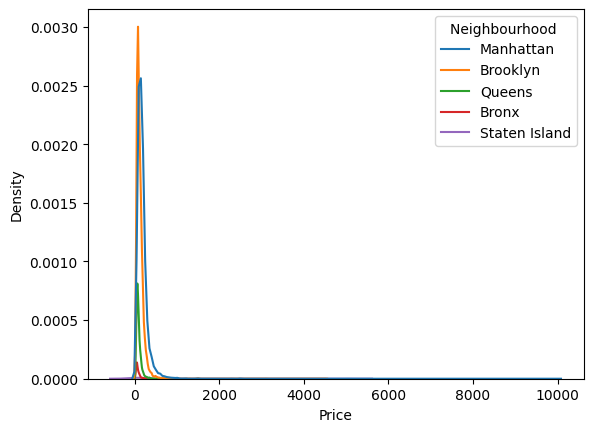

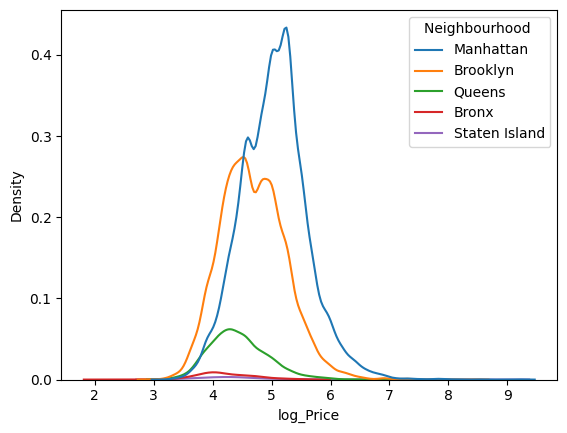

In [325]:
'''Compute the average prices and scores by Neighborhood 
which borough is the most expensive on average? Create a kernel density plot of price and log price, grouping by Neighborhood.'''

avg_price = df.groupby('Neighbourhood ')['Price'].mean()
avg_score = df.groupby('Neighbourhood ')['Review Scores Rating'].mean()

print(avg_price)
print(avg_score)

df['log_Price'] = np.log(df['Price'])

sns.kdeplot(data=df, x='Price', hue='Neighbourhood ')
plt.show()
sns.kdeplot(data=df, x='log_Price', hue='Neighbourhood ')
plt.show()

Manhattan is the most expensive borough on average.

In [326]:
'''Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. 
Compare the coefficients in the regression to the table from part 1. 
What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?'''

x = pd.get_dummies(df['Neighbourhood '])
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

TRAIN: (17722, 5) (17722,)
TEST: (4431, 5) (4431,)


In [327]:
regr = linear_model.LinearRegression(fit_intercept=False)
regr.fit(x_train, y_train)
predicted = regr.predict(x_test)

print("COEFS:", regr.coef_.round(3))

COEFS: [ 70.174 128.093 183.556  96.42  151.4  ]


I see a pattern that the coefficients are the average price of each borough. The coefficients are the average of each category 

In [328]:
#3 - leave intercept

regr1 = linear_model.LinearRegression(fit_intercept=True)
regr1.fit(x_train, y_train)
predicted = regr.predict(x_test)

print("COEFS:", regr1.coef_.round(3))

COEFS: [-55.754   2.164  57.627 -29.508  25.471]


In [329]:
x = pd.get_dummies(df[['Neighbourhood ', 'Review Scores Rating']])
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

model = linear_model.LinearRegression()

model.fit(x_train, y_train)

coefs = Series(model.coef_, index=x.columns)
print(coefs)

# Coefficient on Review Scores Rating
print("Coefficient on Review Scores Rating:", coefs['Review Scores Rating'])



TRAIN: (17722, 6) (17722,)
TEST: (4431, 6) (4431,)
Review Scores Rating             1.007598
Neighbourhood _Bronx           -55.746873
Neighbourhood _Brooklyn          1.499859
Neighbourhood _Manhattan        57.382987
Neighbourhood _Queens          -29.463231
Neighbourhood _Staten Island    26.327258
dtype: float64
Coefficient on Review Scores Rating: 1.0075976052691396


The new intercept is the average price of the reference category. The coefficients are the difference between the average price of each category and the average price of the reference category.

In [330]:
test_set = df.loc[x_test.index].copy()

# create a column for the predictions:
y_pred = model.predict(x_test).flatten()
test_set["PredictedPrice"] = y_pred.round(1)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))


mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse,3))

rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))

R^2: 0.072
MSE: 14759.779
RMSE: 121.49


The most expensive kind of property is in Manhattan.

In [331]:
x = pd.get_dummies(df[['Neighbourhood ', 'Property Type', 'Review Scores Rating']])
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

model = linear_model.LinearRegression()

model.fit(x_train, y_train)

coefs = Series(model.coef_, index=x.columns)

# Coefficient on Review Scores Rating
print("Coefficient on Review Scores Rating:", coefs['Review Scores Rating'])

test_set = df.loc[x_test.index].copy()

# create a column for the predictions:
y_pred = model.predict(x_test).flatten()
test_set["PredictedPrice"] = y_pred.round(1)

r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))

mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse, 3))

rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))

# Most expensive kind of property
most_expensive_property = coefs[coefs.index.str.startswith('Property Type_')].idxmax()
print("Most expensive kind of property:", most_expensive_property)

TRAIN: (17722, 24) (17722,)
TEST: (4431, 24) (4431,)
Coefficient on Review Scores Rating: 1.0068957591041754
R^2: 0.086
MSE: 14536.847
RMSE: 120.569
Most expensive kind of property: Property Type_Condominium


#### Q1.6

> When the coefficient on Review Score Ratings changes from part 4 to part 5, it means that the coefficient on Review Score Ratings is affected by the inclusion of the Property Type in the model. This means that the relationship is affected by property type.

## Q2:


In [332]:
cars = pd.read_csv('../data/cars_hw.csv')
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


               count          mean           std        min        25%  \
Make                                                                     
Chevrolet        6.0  4.535000e+05  2.466064e+05   267000.0   288500.0   
Datsun           3.0  2.896667e+05  1.050397e+04   279000.0   284500.0   
Ford            52.0  7.211731e+05  1.409277e+05   290000.0   635000.0   
Honda           73.0  7.989726e+05  2.665091e+05   316000.0   581000.0   
Hyundai        305.0  6.918918e+05  2.791597e+05   248000.0   485000.0   
Jeep             4.0  1.499500e+06  1.525134e+05  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  1.190567e+05  1369000.0  1579000.0   
MG Motors       35.0  1.869457e+06  1.216611e+05  1589000.0  1786500.0   
Mahindra        18.0  1.100167e+06  1.755493e+05   796000.0  1037000.0   
Maruti Suzuki  293.0  5.887850e+05  2.160199e+05   237000.0   411000.0   
Nissan           4.0  8.842500e+05  2.895599e+05   475000.0   782500.0   
Renault         68.0  6.625735e+05  2.

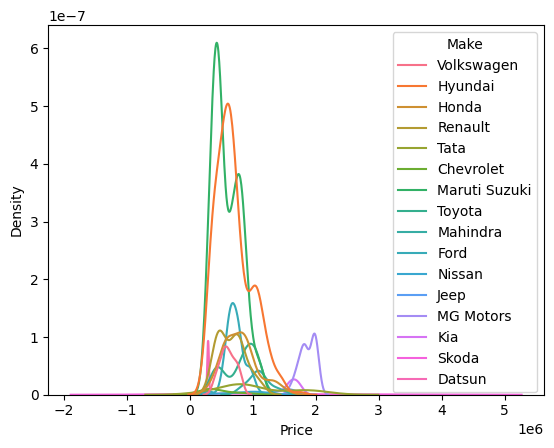

In [333]:
price = cars.groupby('Make')['Price'].describe()
print(price)

sns.kdeplot(data=cars, x='Price', hue='Make')
plt.show()

The most expensive brand seems to be MG Motors. The prices are around the same area with a high peak of density on the cheaper side with a few more on the expensive side.

In [334]:
x = pd.get_dummies(cars.drop(columns=['Price']))
y = cars['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)


TRAIN: (780, 53) (780,)
TEST: (196, 53) (196,)


In [335]:
# Numeric variables
numeric_vars = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']
x_numeric = cars[numeric_vars]
y = cars['Price']

# Split the data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x_numeric, y, random_state=99, test_size=0.2)

# Create and fit the model
model_numeric = linear_model.LinearRegression()
model_numeric.fit(x1_train, y1_train)

# Predict on the test set
y_pred_numeric = model_numeric.predict(x1_test)

# Calculate R^2 and RMSE
r2_numeric = r2_score(y1_test, y_pred_numeric)
mse_numeric = mean_squared_error(y_test, y_pred_numeric)
rmse_numeric = mse_numeric ** 0.5

print("R^2:", round(r2_numeric, 3))
print("RMSE:", round(rmse_numeric, 3))

R^2: 0.372
RMSE: 256777.401


In [336]:

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
x_categorical = pd.get_dummies(cars[categorical_vars], drop_first=True)
y = cars['Price']

# Split the data into training and testing sets
x2_train, x2_test, y2_train, y2_test = train_test_split(x_categorical, y, random_state=99, test_size=0.2)

# Create and fit the model
model_categorical = linear_model.LinearRegression()
model_categorical.fit(x2_train, y2_train)

# Predict on the test set
y_pred_categorical = model_categorical.predict(x2_test)

# Calculate R^2 and RMSE
r2_categorical = r2_score(y2_test, y_pred_categorical)
mse_categorical = mean_squared_error(y_test, y_pred_categorical)
rmse_categorical = mse_categorical ** 0.5

print("R^2:", round(r2_categorical, 3))
print("RMSE:", round(rmse_categorical, 3))

R^2: 0.722
RMSE: 170812.775


In [337]:

x_combined = pd.concat([x_numeric, x_categorical], axis=1)
y = cars['Price']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_combined, y, random_state=99, test_size=0.2)

# Create and fit the model
model_combined = linear_model.LinearRegression()
model_combined.fit(x_train, y_train)

# Predict on the test set
y_pred_combined = model_combined.predict(x_test)

# Calculate R^2 and RMSE
r2_combined = r2_score(y_test, y_pred_combined)
mse_combined = mean_squared_error(y_test, y_pred_combined)
rmse_combined = mse_combined ** 0.5

print("R^2:", round(r2_combined, 3))
print("RMSE:", round(rmse_combined, 3))

R^2: 0.849
RMSE: 125720.657


The best model is the combined model as it has a higher R2 and lower RMSE than both the numerical and categorical models. This shows the combined is better by a large margin compared to the numerical and a smaller margin compared to the categorical.

In [338]:
list = []

def poly(i):
    poly = PolynomialFeatures(degree=i)
    train_poly = poly.fit_transform(x1_train)
    test_poly = poly.transform(x1_test)
    m1 = linear_model.LinearRegression() 
    m1.fit(train_poly, y1_train)
    y_pred_numeric = m1.predict(test_poly)
    r2_numeric = r2_score(y1_test, y_pred_numeric)
    mse_numeric = mean_squared_error(y1_test, y_pred_numeric)
    rmse_numeric = mse_numeric ** 0.5
    return r2_numeric, rmse_numeric

for i in range(1, 7):
    r2_numeric, rmse_numeric = poly(i)
    list.append((r2_numeric, rmse_numeric))

    
list

[(0.3718759539638873, 256777.4013175391),
 (0.44639605223171386, 241064.7328053151),
 (0.4215462890683672, 246415.7116581784),
 (0.42461100077120906, 245762.07591020776),
 (0.4119886921132485, 248443.09367124844),
 (0.42098402633345766, 246535.44182639537)]

Use the PolynomialFeatures function from sklearn to expand the set of numerical variables you’re using in the regression. As you increase the degree of the expansion, how do the 
R
2
R 
2
  and RMSE change? At what point does 
R
2
R 
2
  go negative on the test set? For your best model with expanded features, what is the 
R
2
R 
2
  and RMSE? How does it compare to your best model from part 4?
For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.


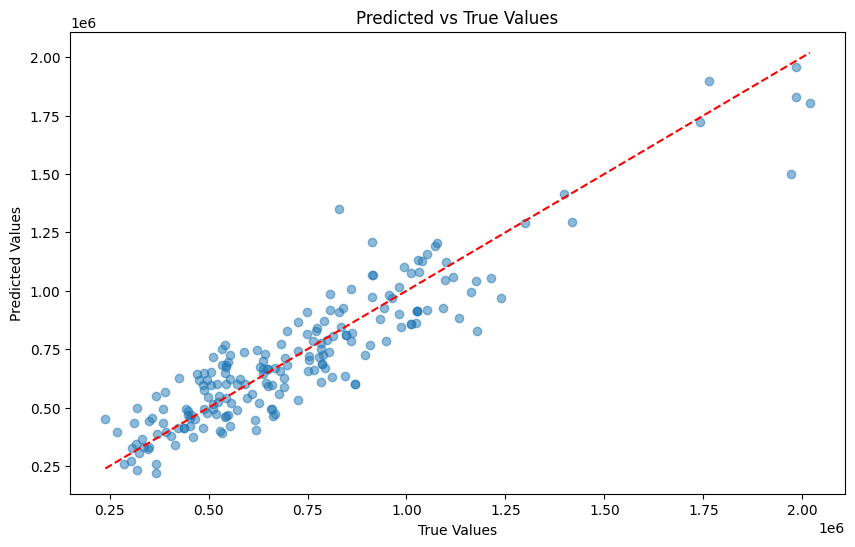

Text(0, 0.5, 'Density')

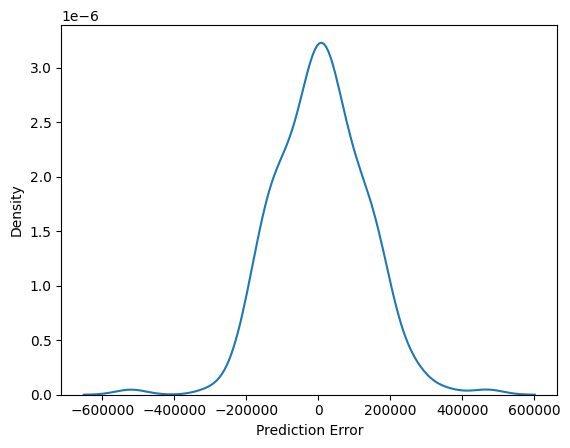

In [339]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_combined, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()

errors = y_test - y_pred_combined
sns.kdeplot(errors)
plt.xlabel('Prediction Error')
plt.ylabel('Density')

## Q3:

In [340]:
food = pd.read_csv('../data/daily_food_nutrition_dataset.csv')
food.describe()


,User_ID,Calories (kcal),Protein (g),Carbohydrates (g),Fat (g),Fiber (g),Sugars (g),Sodium (mg),Cholesterol (mg),Water_Intake (ml)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,498.706300,327.693900,25.523050,52.568550,25.43735,4.986940,25.052570,497.969000,151.886600,554.353600
std,289.123477,158.194716,14.131993,27.387152,14.14532,2.864984,14.480605,287.988001,87.360643,260.977642
min,1.000000,50.000000,1.000000,5.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.000000
25%,245.000000,190.000000,13.200000,28.800000,13.30000,2.500000,12.500000,249.750000,76.000000,327.000000
50%,492.000000,328.000000,25.500000,52.800000,25.30000,5.000000,25.000000,495.000000,153.000000,555.500000
75%,748.000000,464.000000,37.700000,76.400000,37.60000,7.500000,37.700000,749.000000,228.000000,783.000000
max,1000.000000,600.000000,50.000000,100.000000,50.00000,10.000000,50.000000,1000.000000,300.000000,1000.000000


In [341]:
# clean up the data
food = food.dropna()
food.drop(columns=['Date', 'User_ID'], inplace=True)

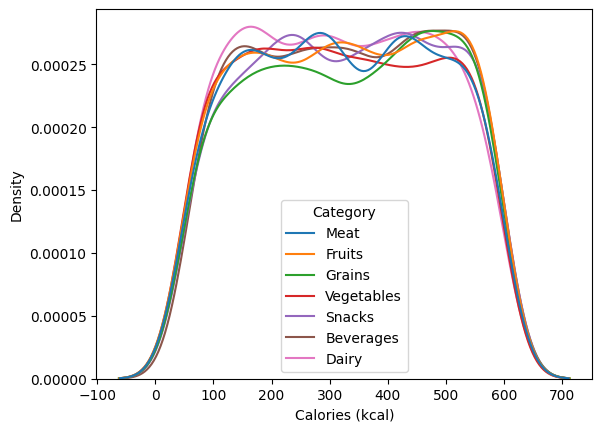

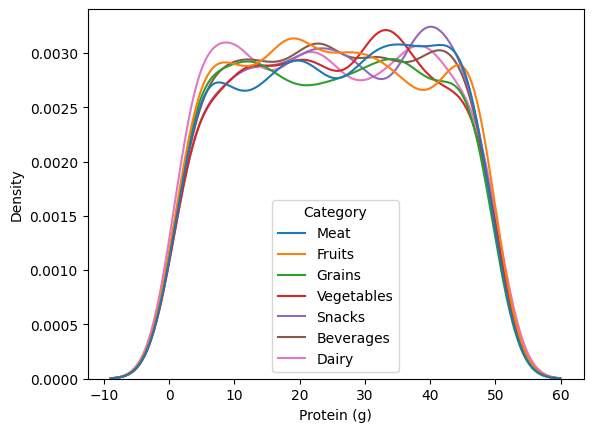

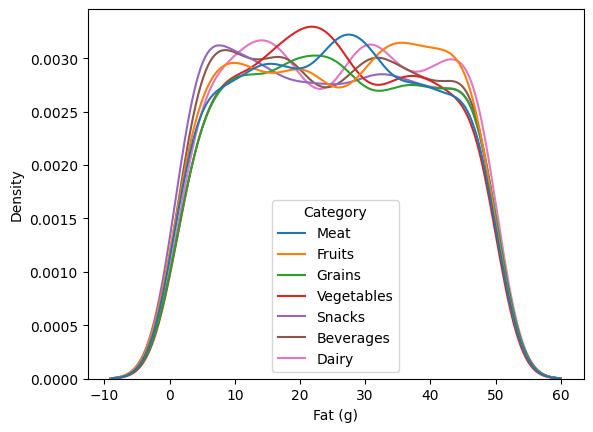

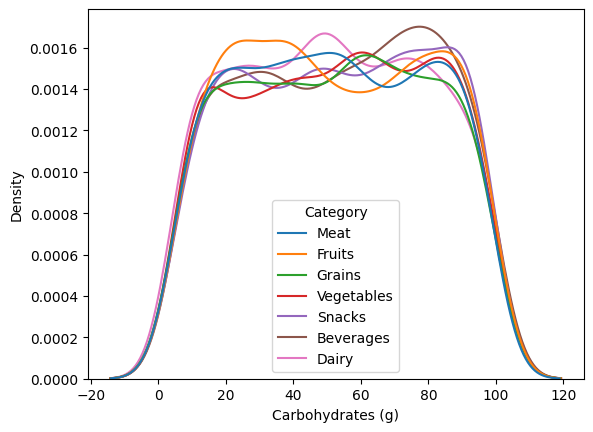

In [342]:
# plot 
sns.kdeplot(data=food, x='Calories (kcal)',
            hue='Category')
plt.show()
sns.kdeplot(data=food, x='Protein (g)',
            hue='Category')
plt.show()
sns.kdeplot(data=food, x='Fat (g)',
            hue='Category')
plt.show()
sns.kdeplot(data=food, x='Carbohydrates (g)',
            hue='Category')
plt.show()

In [343]:
x = pd.get_dummies(food[['Category', 'Protein (g)']])
y = food['Calories (kcal)']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test).flatten()
r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))
mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse, 3))
rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))


TRAIN: (8000, 8) (8000,)
TEST: (2000, 8) (2000,)
R^2: -0.002
MSE: 24643.749
RMSE: 156.983


In [344]:
x = pd.get_dummies(food[['Meal_Type', 'Fat (g)']])
y = food['Calories (kcal)']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test).flatten()
r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))
mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse, 3))
rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))

TRAIN: (8000, 5) (8000,)
TEST: (2000, 5) (2000,)
R^2: -0.004
MSE: 24706.443
RMSE: 157.183


In [345]:
x = pd.get_dummies(food[['Meal_Type', 'Category']])
y = food['Calories (kcal)']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test).flatten()
r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))
mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse, 3))
rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))

TRAIN: (8000, 11) (8000,)
TEST: (2000, 11) (2000,)
R^2: -0.002
MSE: 24650.962
RMSE: 157.006


In [346]:
x = pd.get_dummies(food[['Meal_Type', 'Category']])
y = food['Calories (kcal)']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=99, test_size=0.2)
print("TRAIN:", x_train.shape, y_train.shape)
print("TEST:", x_test.shape, y_test.shape)

model = linear_model.LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test).flatten()
r2 = r2_score(y_test, y_pred)
print("R^2:", round(r2, 3))
mse = mean_squared_error(y_test, y_pred)
print("MSE:", round(mse, 3))
rmse = mse ** 0.5
print("RMSE:", round(rmse, 3))

TRAIN: (8000, 11) (8000,)
TEST: (2000, 11) (2000,)
R^2: -0.002
MSE: 24650.962
RMSE: 157.006


##### Which model performed the best, and why?

##### What did you learn?